$$-y''+x^2y = (\frac{9}{4}+x^2)cos3x$$
$$x\in[0,1], \  y(0) = 1, \  y(1) = 0$$

Решить задачу методом стрельбы, стрелять будем "влево", задавая производную в точке $x=1$. Потом используя неявный метод Эйлера для системы уравнений(p=y'), построим решение и найдем значение слева:
$$\frac{p_{i+1}-p_i}{h}=x_{i}^2 y_i-\left(\frac{9}{4}+x_i^2\right)cos3x_i$$
$$\frac{y_{i+1}-y_i}{h}=p_i$$
$$p(1) = y'(1)= \alpha, y(1) = 0$$

In [2]:
N = 1000+1
h = 0.001

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
y = np.zeros(N)
p = np.zeros(N)
x = np.zeros(N)

In [5]:
for i in range(0,N):
    x[i] = h*i

In [8]:
y[N-1] = 0

In [9]:
#Зададим производную в т. х=1 равную 1
alpha = 1.
p[N-1] = alpha

In [10]:
from math import cos

In [11]:
def fu_yn(y_n,p_n,x_n1):
    return (y_n-h*p_n+h**2*(9/4.+x_n1**2)*cos(3*x_n1))/(1+h**2*x_n1**2)

In [12]:
def fu_pn(y_n,y_n1):
    return (y_n-y_n1)/h

In [20]:
for i in range(0,N-1):
    y[N-2-i] = fu_yn(y[N-1-i],p[N-1-i],x[N-2-i])
    p[N-2-i] = fu_pn(y[N-1-i],y[N-2-i])

In [21]:
#Зададим линейную функцию
y0 = -1*x+1

-1.4875788680543942

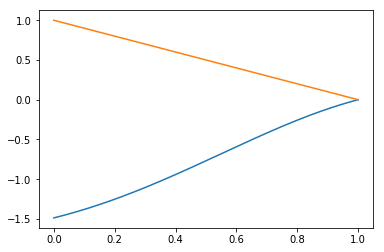

In [22]:
plt.plot(x,y) #Очевидно, решение не сошлось, сравниваем с линеаризованным
plt.plot(x,y0)
y[0]

In [29]:
#Зададим производную в т. х=1 равную -1
alpha = -1.
p[N-1] = alpha

In [30]:
for i in range(0,N-1):
    y[N-2-i] = fu_yn(y[N-1-i],p[N-1-i],x[N-2-i])
    p[N-2-i] = fu_pn(y[N-1-i],y[N-2-i])

0.41364639757754756

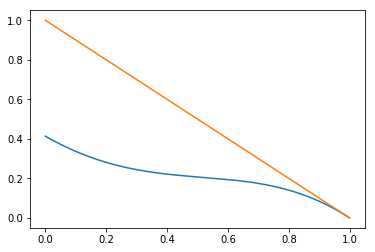

In [31]:
plt.plot(x,y) #Очевидно, решение не сошлось, сравниваем с линеаризованным
plt.plot(x,y0)
y[0]

In [43]:
#Будем стрелять так, чтобы приблизиться к решению такому, что у(0)=1
#Зададим производные в т. х=1
alpha1 = 0.
alpha2 = -1.
alpha3 = -5.
y1 = np.zeros(N)
p1 = np.zeros(N)
y2 = np.zeros(N)
p2 = np.zeros(N)
y3 = np.zeros(N)
p3 = np.zeros(N)
p1[N-1] = alpha1
p2[N-1] = alpha2
p3[N-1] = alpha3
for i in range(0,N-1):
    y1[N-2-i] = fu_yn(y1[N-1-i],p1[N-1-i],x[N-2-i])
    p1[N-2-i] = fu_pn(y1[N-1-i],y1[N-2-i])
    y2[N-2-i] = fu_yn(y2[N-1-i],p2[N-1-i],x[N-2-i])
    p2[N-2-i] = fu_pn(y2[N-1-i],y2[N-2-i])
    y3[N-2-i] = fu_yn(y3[N-1-i],p3[N-1-i],x[N-2-i])
    p3[N-2-i] = fu_pn(y3[N-1-i],y3[N-2-i])


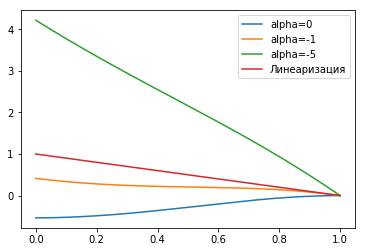

In [44]:
plt.plot(x,y1,label='alpha=0')
plt.plot(x,y2,label='alpha=-1')
plt.plot(x,y3,label='alpha=-5')
plt.plot(x,y0,label=u'Линеаризация')
plt.legend()
plt.show()

2.3148716632107664 -3.0
1.3642590303941873 -2.0
0.888952713984867 -1.5
1.1266058721890704 -1.75
1.0077792930872271 -1.625
0.9483660035363507 -1.5625
0.9780726483120082 -1.59375
0.9929259706994183 -1.609375
1.0003526318931142 -1.6171875


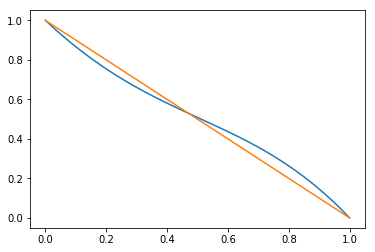

In [45]:
#Делаем вывод, что нужная нам alpha принадлежит [-5,-1], дальше ищем методом половинного деления
an = -5.
bn = -1.
error = 1
while (np.abs(error) > 0.001):
    alphan = (an+bn)/2.

    yn = np.zeros(N)
    pn = np.zeros(N)
    pn[N-1] = alphan
    for i in range(0,N-1):        
        yn[N-2-i] = fu_yn(yn[N-1-i],pn[N-1-i],x[N-2-i])
        pn[N-2-i] = fu_pn(yn[N-1-i],yn[N-2-i])
    print(yn[0], alphan)
    error = yn[0] - 1.
    if (error > 0): 
        an = alphan
    if (error < 0):
        bn = alphan
plt.plot(x,yn)
plt.plot(x,y0)

Получаем, что y'(1) = -1.6171875, y(0)=1
и error = 0.0004